<a href="https://colab.research.google.com/github/harinadh01/Data-Analysis/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global_Superstore1.csv to Global_Superstore1.csv


First 5 rows of the dataset:


,Product Name,Region,Sales,Profit,Discount,Category,Date
0,Samsung Convoy 3,Central US,221.98,62.15,0.0,Technology,11/13/2014
1,"Novimex Executive Leather Armchair, Black",Oceania,3709.40,-288.77,0.1,Furniture,02-07-2014
2,"Nokia Smart Phone, with Caller ID",Oceania,5175.17,919.97,0.1,Technology,10/18/2014
3,"Motorola Smart Phone, Cordless",Western Europe,2892.51,-96.54,0.1,Technology,1/30/2014
4,"Sharp Wireless Fax, High-Speed",Western Africa,2832.96,311.52,0.0,Technology,11-06-2014



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  1000 non-null   object 
 1   Region        1000 non-null   object 
 2   Sales         1000 non-null   float64
 3   Profit        1000 non-null   float64
 4   Discount      1000 non-null   float64
 5   Category      1000 non-null   object 
 6   Date          1000 non-null   object 
dtypes: float64(3), object(4)
memory usage: 54.8+ KB

Statistical Summary:


,Sales,Profit,Discount
count,1000.000000,1000.000000,1000.000000
mean,1710.971470,288.920440,0.092840
std,1259.239238,574.504782,0.148666
min,1.910000,-3059.820000,0.000000
25%,826.907500,10.037500,0.000000
50%,1585.115000,190.685000,0.000000
75%,2477.812500,518.872500,0.150000
max,9892.740000,4946.370000,0.800000


Number of duplicate rows: 0

Missing values before cleaning:
Product Name    0
Region          0
Sales           0
Profit          0
Discount        0
Category        0
Date            0
dtype: int64

Missing values after cleaning:
Product Name    0
Region          0
Sales           0
Profit          0
Discount        0
Category        0
Date            0
dtype: int64
['Product Name', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date']

Data after cleaning:


,Product Name,Region,Sales,Profit,Discount,Category,Date
0,Samsung Convoy 3,Central US,221.98,62.15,0.0,Technology,2014-11-13
1,"Novimex Executive Leather Armchair, Black",Oceania,3709.40,-288.77,0.1,Furniture,NaT
2,"Nokia Smart Phone, with Caller ID",Oceania,5175.17,919.97,0.1,Technology,2014-10-18
3,"Motorola Smart Phone, Cordless",Western Europe,2892.51,-96.54,0.1,Technology,2014-01-30
4,"Sharp Wireless Fax, High-Speed",Western Africa,2832.96,311.52,0.0,Technology,NaT


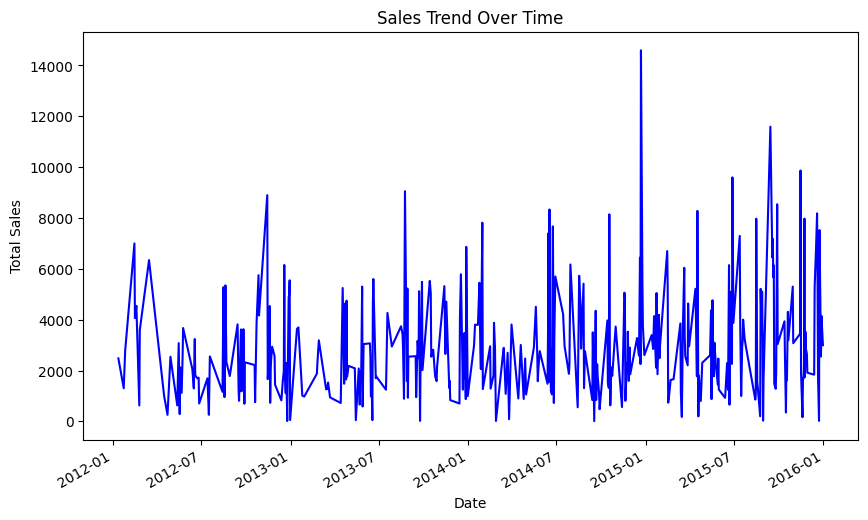

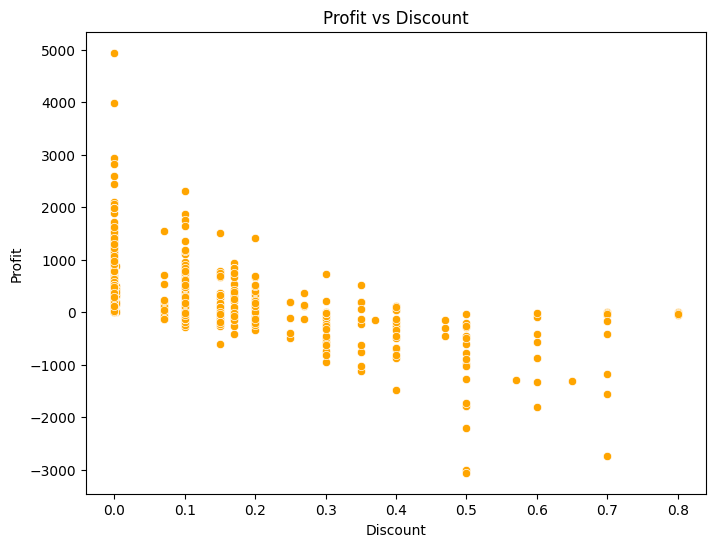

Mean Squared Error: 768263.97
R-squared Score: 0.39


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Global_Superstore1.csv")  # Ensure you provide the correct file name

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic Information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"\nMissing values before cleaning:\n{df.isnull().sum()}")

# Fill missing numerical values with column mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


print(f"\nMissing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format
print(df.columns.tolist())

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



# Verify the changes
print("\nData after cleaning:")
display(df.head())

# Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

# Select features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")
